In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Load

In [2]:
data=pd.read_csv("Price.csv")
data

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W
...,...,...,...,...,...,...,...
99297,लसुन सुकेको नेपाली,के.जी.,६००,६२०,६१०,02/15/2020,R
99298,ताजा माछा(रहु),के जी,३२०,३३०,३२५,02/15/2020,R
99299,ताजा माछा(बचुवा),के जी,२८०,३००,२९०,02/15/2020,R
99300,ताजा माछा(छडी),के जी,२८०,३००,२९०,02/15/2020,R


## Data preprocessing

In [3]:

data.rename(columns={'कृषि उपज':'Vegetable','ईकाइ':'Quantity',
                     'न्यूनतम':'MinPrice','अधिकतम':'MaxPrice','औसत':'Average'},inplace=True)

In [4]:
# convert cdate into pandas date
data['cdate']=pd.to_datetime(data['cdate'])
data.head()


,Vegetable,Quantity,MinPrice,MaxPrice,Average,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,2018-02-25,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,2018-02-25,W
2,अालु रातो,के.जी.,२०,२३,२२,2018-02-25,W
3,अालु सेतो,के.जी.,१८,२०,१९,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,2018-02-25,W


In [5]:
#convert Devanagari number into english digits

def convert(val):
    result=[]
    for v in val:
        result.append(int(v))
    return result 

data['MinPrice']=convert(data['MinPrice'].tolist())
data['MaxPrice']=convert(data['MaxPrice'].tolist())
data['Average']=convert(data['Average'].tolist())

In [6]:
data.head()

,Vegetable,Quantity,MinPrice,MaxPrice,Average,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W


In [7]:
vegetable=set(data['Vegetable'].values)
len(vegetable)

120

# Data Analysis and Visualization

### Find the name of vegetables

In [8]:
vegetable_name=data['Vegetable'].unique()
print( vegetable_name)

['गोलभेडा ठूलो(नेपाली)' 'गोलभेडा सानो' 'अालु रातो' 'अालु सेतो'
 'प्याज सुकेको भारतीय' 'गाजर(लोकल)' 'बन्दा(लोकल)' 'काउली स्थानिय'
 'काउली तरार्इ' 'मूला रातो' 'मूला सेतो(लोकल)' 'भन्टा लाम्चो' 'भन्टा डल्लो'
 'मटरकोशा' 'घिउ सिमी(लोकल)' 'टाटे सिमी' 'लौका' 'फर्सी पाकेको'
 'फर्सी हरियो(लाम्चो)' 'भिण्डी' 'बरेला' 'पिंडालू' 'स्कूस' 'रायो साग'
 'पालूगो साग' 'चमसूरको साग' 'तोरीको साग' 'मेथीको साग' 'प्याज हरियो'
 'बकूला' 'तरुल' 'च्याउ(कन्य)' 'ब्रोकाउली' 'चुकुन्दर' 'जिरीको साग'
 'ग्याठ कोबी' 'सेलरी' 'पार्सले' 'सौफको साग' 'पुदीना' 'गान्टे मूला' 'इमली'
 'तामा' 'तोफु' 'गुन्दुक' 'स्याउ(झोले)' 'केरा' 'कागती' 'अनार'
 'अंगुर(हरियो)' 'सुन्तला(नेपाली)' 'तरबुजा(हरियो)' 'मौसम' 'भुर्इ कटहर'
 'काक्रो(लोकल)' 'रुख कटहर' 'नासपाती(लोकल)' 'मेवा(नेपाली)' 'लप्सी' 'अदुवा'
 'खु्र्सानी सुकेको' 'खु्र्सानी हरियो' 'भेडे खु्र्सानी' 'लसुन हरियो'
 'हरियो धनिया' 'लसुन सुकेको चाइनिज' 'लसुन सुकेको नेपाली' 'माछा ताजा'
 'रातो बन्दा' 'तितो करेला' 'परवर(लोकल)' 'छ्यापी हरियो' 'बोडी(तने)' 'सजिवन'
 'कोइरालो' 'घिरौला' 'आँप(मालदह)' 'चिचिण्

###  Find the total number of vegetables

In [9]:
vegetable_length=len(vegetable_name)
print("There are {} unique vegetables.".format(vegetable_length))

There are 120 unique vegetables.


### Histogram of Number of vegetables their average price

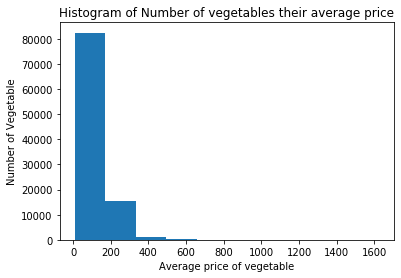

In [10]:
data['Average'].plot.hist()
plt.xlabel('Average price of vegetable')
plt.ylabel('Number of Vegetable')
plt.title('Histogram of Number of vegetables their average price')
plt.show()

 The above histogram showed that maximum vegetable has an average price between 1 to 150

### Find the minimum price  of vegetable

In [11]:
min_price=data.MinPrice.min()
print( "Minimun price of vegetables is Rs.",min_price)

Minimun price of vegetables is Rs. 1


### count the number of vegetables whose price is Rs.1

In [12]:
min_price_vegetable=data[data.MinPrice==1]
length_min_price=len(min_price_vegetable)
print("There are {} vegetables whose price is Rs.{}".format(length_min_price,min_price))

There are 3 vegetables whose price is Rs.1


### Find the details about minimum price vegetables

In [13]:

detail_min=data[data.MinPrice==1]
detail_min

,Vegetable,Quantity,MinPrice,MaxPrice,Average,cdate,pricetype
25011,झिगूनी,के.जी.,1,48,31,2018-09-09,W
36257,काउली स्थानिय,के.जी.,1,40,21,2018-12-09,R
37157,तरबुजा(हरियो),के.जी.,1,55,28,2018-12-16,W


 It showed that झिगूनी,काउली स्थानिय and तरबुजा(हरियो)
  have a minimum price(Rs.1) than other vegetables at different dates.

### Find the maximum price  of vegetable

In [14]:
max_price=data.MaxPrice.max()

print( "Maximum price of vegetables is Rs.",max_price)

Maximum price of vegetables is Rs. 1650


### count the number of vegetables whose price is Rs.1650

In [15]:
max_price_vegetable=data[data.MaxPrice==1650]
len_max_price_vegetable=len(max_price_vegetable)
print("There are {} vegetables whose price is Rs.{}".format(len_max_price_vegetable,max_price))

There are 6 vegetables whose price is Rs.1650


### Find the details about maximum price vegetables

In [16]:
detail_max=data[data.MaxPrice==1650]
print(detail_max)

     Vegetable Quantity  MinPrice  MaxPrice  Average      cdate pricetype
5431     कागती   के.जी.      1600      1650     1625 2018-04-06         R
5843     कागती   के.जी.      1600      1650     1625 2018-04-09         R
5981     कागती   के.जी.      1600      1650     1625 2018-04-10         R
6117     कागती   के.जी.      1600      1650     1625 2018-04-11         R
6251     कागती   के.जी.      1600      1650     1625 2018-04-12         R
6385     कागती   के.जी.      1600      1650     1625 2018-04-13         R


It showed that कागती has a maximum(Rs.1650) price among other vegetables and कागती price maximum in April.

### Histogram of Pricetype

In [22]:
from collections import Counter

In [27]:

pricetype_count=Counter(data['pricetype']) 
print(pricetype_count)

Counter({'W': 49656, 'R': 49646})


Text(0.5, 1.0, 'Number of vegetables and their pricetype')

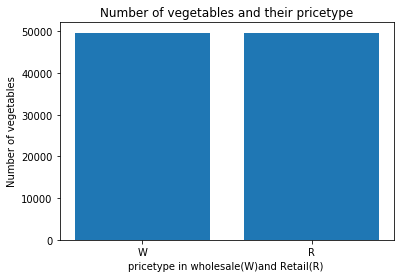

In [29]:
plt.bar(range(len(pricetype_count)),list(pricetype_count.values()),tick_label=list(pricetype_count.keys()))
plt.xlabel("pricetype in wholesale(W)and Retail(R) ")
plt.ylabel("Number of vegetables")
plt.title("Number of vegetables and their pricetype")

From the above found that a number of wholesale and retail is not the same.
The difference between wholesale and retail price type is 10

## Feature Extraction
Adding two features: 
price of yesterday and the day before yesterday

In [35]:
 feature_df=[]
 for v in vegetable:
    for p_type in ['W','R']:
            # gettig last two days as features
            df_v=data[(data['Vegetable']==v) &(data['pricetype']==p_type)]# one one vegetable and that only one pricetype
            df_v = df_v.sort_values(by=['cdate'] ,ascending=False)
            
            if p_type=='W':
                df_v['type']=1
            else:
                df_v['type']=0
            
            df_v['t_1']=df_v.shift(-1)['Average']
            df_v['t_2']=df_v.shift(-2)['Average']
            feature_df.append(df_v)
# feature_df   
 

 

In [36]:
feature_df=pd.concat(feature_df)
feature_df.head()

,Vegetable,Quantity,MinPrice,MaxPrice,Average,cdate,pricetype,type,t_1,t_2
99190,कागती,के.जी.,120,130,125,2020-02-15,W,1,125.0,125.0
99022,कागती,के.जी.,120,130,125,2020-02-14,W,1,125.0,105.0
98859,कागती,के.जी.,120,130,125,2020-02-13,W,1,105.0,105.0
98698,कागती,के.जी.,100,110,105,2020-02-12,W,1,105.0,105.0
98537,कागती,के.जी.,100,110,105,2020-02-11,W,1,105.0,105.0


In [39]:
feature_df.dropna(inplace=True)# deleting row containing NAN

feature_df.tail()

,Vegetable,Quantity,MinPrice,MaxPrice,Average,cdate,pricetype,type,t_1,t_2
73608,तितो करेला,के.जी.,50,60,55,2019-09-03,R,0,45.0,55.0
9533,फर्सी पाकेको,के.जी.,28,30,29,2018-05-07,W,1,29.0,29.0
2580,मूला सेतो(लोकल),के.जी.,40,45,43,2018-03-17,R,0,45.0,38.0
54180,गाजर(लोकल),के.जी.,24,26,25,2019-04-25,W,1,25.0,27.0
37453,फर्सी पाकेको,के.जी.,30,40,35,2018-12-18,R,0,23.0,35.0


In [40]:
feature_df=feature_df.sample(frac=1 ,random_state=1)# random shuffling of data
x=feature_df[['type','t_1','t_2']].values

In [41]:
x = np.insert(x, 0, values=1, axis = 1) #adding bias or intercept term
x


array([[  1.,   1.,  35.,  31.],
       [  1.,   0.,  65.,  55.],
       [  1.,   0.,  63.,  63.],
       ...,
       [  1.,   1.,  28.,  28.],
       [  1.,   0., 105., 105.],
       [  1.,   1., 155., 155.]])

In [42]:
x.shape

(98822, 4)

In [43]:
y = feature_df['Average'].values
print(y.shape)

(98822,)


## split into train,val and test set

In [44]:
total=len(x)
train=int(0.6*total)
val=int(0.2*total)

x_train=x[:train]
y_train=y[:train].reshape(-1,1)

x_val=x[train:train+val]
y_val=y[train:train+val].reshape(-1,1)

x_test=x[train+val:]
y_test=y[train+val:].reshape(-1,1)

print(len(x_train),len(x_val),len(x_test))
print(len(y_train),len(y_val),len(y_test))


59293 19764 19765
59293 19764 19765


## Min_Max Normalization
to know max and min value from training set and used in validation and test set


In [45]:
 
x_train 

array([[  1.,   1.,  35.,  31.],
       [  1.,   0.,  65.,  55.],
       [  1.,   0.,  63.,  63.],
       ...,
       [  1.,   0.,  55.,  55.],
       [  1.,   0.,  35.,  35.],
       [  1.,   0., 135., 135.]])

In [46]:

price_x=x_train[:,2:]
price_x

array([[ 35.,  31.],
       [ 65.,  55.],
       [ 63.,  63.],
       ...,
       [ 55.,  55.],
       [ 35.,  35.],
       [135., 135.]])

In [47]:
min_v=np.min(price_x)
max_v=np.max(price_x)
diff=max_v-min_v

def min_max_normalization(dataset):
    for i in range(0,dataset.shape[0]):# dataset.shape[0] no of rows
        for j in range(2,dataset.shape[1]):#dataset.shape[1] no of column
            dataset[i][j]=(dataset[i][j]-min_v)/diff 

In [48]:
min_max_normalization(x_train)
min_max_normalization(x_val)
min_max_normalization(x_test)

In [49]:
x_train

array([[1.        , 1.        , 0.01608911, 0.01361386],
       [1.        , 0.        , 0.03465347, 0.02846535],
       [1.        , 0.        , 0.03341584, 0.03341584],
       ...,
       [1.        , 0.        , 0.02846535, 0.02846535],
       [1.        , 0.        , 0.01608911, 0.01608911],
       [1.        , 0.        , 0.0779703 , 0.0779703 ]])

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


### Build Model

In [51]:
def MSE(h,y):
    return 0.5*np.average((h-y)**2)

In [52]:

np.random.seed(42)

#hyperparameters
param = {
    'number_of_iterations': 1000,
    'learning_rate': 0.001
}

grid_param = {
    'number_of_iterations': [1000, 2000],
    'learning_rate': [0.001,0.1]
}

In [53]:
def train_model(x_train, y_train, x_val, y_val, param):
    W = np.random.rand(x_train.shape[1]).reshape(-1,1)
    train_error = []
    for i in range(1, param['number_of_iterations']):
        h_train = np.matmul(x_train, W)# h=xw
        train_loss = MSE(h_train, y_train)
        train_error.append(train_loss)  

        gradient = np.matmul(np.transpose(x_train),(h_train - y_train))/x_train.shape[0]
        W = W - param['learning_rate'] * gradient   
    h_val = np.matmul(x_val, W)
    val_loss = MSE(h_val, y_val)
    val_error=[val_loss]
    return W, train_error, val_error
#     print(param, val_loss)  


## Grid search

In [54]:
import itertools
grid = list(itertools.product(grid_param['number_of_iterations'], grid_param['learning_rate']))
print(grid)

[(1000, 0.001), (1000, 0.1), (2000, 0.001), (2000, 0.1)]


{'number_of_iterations': 1000, 'learning_rate': 0.001}
[3884.654393660934]


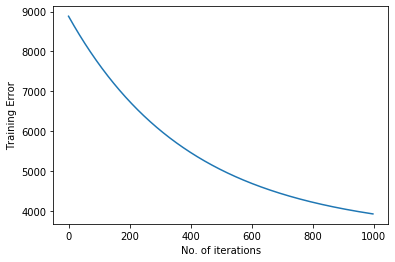

{'number_of_iterations': 1000, 'learning_rate': 0.1}
[1248.7355919790446]


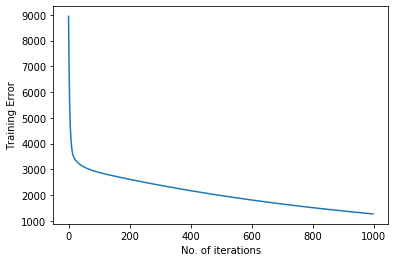

{'number_of_iterations': 2000, 'learning_rate': 0.001}
[3365.909386626661]


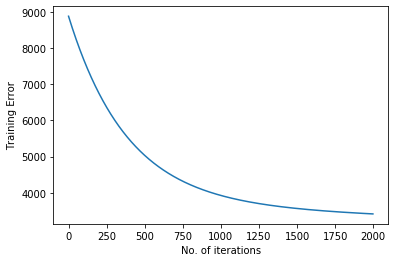

{'number_of_iterations': 2000, 'learning_rate': 0.1}
[539.8636936736576]


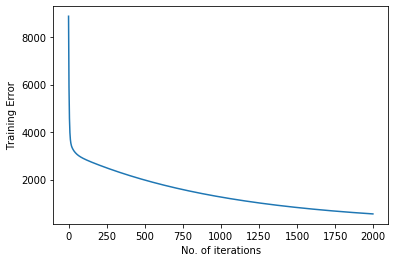

In [55]:
for g in grid:
    p={
    'number_of_iterations':g[0],
    'learning_rate':g[1],
    }
    print(p)
    Weights,train_error,val_error=train_model(x_train,y_train,x_val,y_val,p)
    print(val_error)
    plt.plot(np.arange(len(train_error)),train_error)
    plt.xlabel("No. of iterations")
    plt.ylabel("Training Error")   
    plt.show()


## Train Loss Plot for Best Model

In [88]:
final_param = {'number_of_iterations':2000, 'learning_rate':0.1} 
model_weights=train_model(x_train,y_train,x_val,y_val,final_param)



#error  too many values to unpack (expected 2)
# final_param = {'number_of_iterations':2000, 'learning_rate':0.1} 
# model_weights,train_loss=train_model(x_train,y_train,x_val,y_val,final_param)


In [93]:
plt.plot(train_loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")
plt.grid()
plt.show()

In [90]:
model_weights=model_weights[0]

In [91]:

model_weights

array([[ 51.46945035],
       [ -9.22384589],
       [500.94432109],
       [492.68727369]])

## Model Evaluation with R2 Score

In [92]:
y_mean = np.mean(y_test)

h_test = np.matmul(x_test, model_weights)
n = x_test.shape[0]
k = x_test.shape[1] - 1

SST =np.sum(np.square(y_test - y_mean))
SSR =np.sum(np.square(h_test- y_mean))
SSE=np.sum(np.square(h_test-y_test))
R2 = 1 - SSE/SST
R2

0.8328823181686759